## Read Raw data to work with

In [118]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from feature_selector import FeatureSelector
from matplotlib import pyplot as plt
%matplotlib inline

In [119]:
data = pd.read_csv("../tmp/axel_correlation_value.csv")
data.set_index('id', inplace=True)

data.head()

,Unnamed: 0,Gesamtpunkte,Inhalt_hat_ueberzeugt,Interesse_geweckt,Kuechenzuruf,content,interactions,lead,title,element_type_1_topic,...,title_pos,title_sadness,title_snt_len,title_surprise,title_syll_ct,title_trust,title_ttr,title_uniq_wd,title_words_diff_emotions,correlation_value
id,,,,,,,,,,,,,,,,,,,,,
56593338,0,160.0,54.0,57,49.0,Berlin – Brand am Berliner Nobelb...,54.0,Berlin – Brand am Berliner Nobelb...,Berlin – Brand am Berliner Nobelb...,varo unebene umsatzgetrieben mithat pferdewir...,...,0,0,8.0,0,4.500000,0,1.333333,8,0.0,0.305346
56591632,1,189.0,69.0,69,52.0,Erfurt/Dortmund – Für den Prozess...,69.0,Erfurt/Dortmund – Für den Prozess...,Erfurt/Dortmund – Für den Prozess...,verfetten schwei treibendes leittragenden cor...,...,0,0,11.5,0,2.105263,0,1.210526,23,0.0,0.341409
53808478,2,73.0,33.0,25,13.0,"Sie haben es satt, dabei zuzusehe...",25.0,"Sie haben es satt, dabei zuzusehe...","Sie haben es satt, dabei zuzusehe...",windfeld nachtsichtger te zusammengen htfoto ...,...,0,0,13.0,0,1.920000,0,1.040000,26,0.0,0.977869
54549006,3,149.0,68.0,41,42.0,"Leipzig – Vermummt, bewaffnet, be...",42.0,"Leipzig – Vermummt, bewaffnet, be...","Leipzig – Vermummt, bewaffnet, be...",aktivit tsstatus gegnerdie gef hrlichen haiat...,...,1,0,8.0,0,4.600000,0,1.600000,8,0.0,0.307994
54552288,4,147.0,59.0,53,37.0,Darmstadt – Unfassbares Familiend...,53.0,Darmstadt – Unfassbares Familiend...,Darmstadt – Unfassbares Familiend...,scheidungsbrief alleinstehende gleichungen be...,...,0,0,9.0,0,3.750000,0,1.125000,9,0.0,0.270329


make is_viral column as interactions-value >= 75%-quartile of interactions values column

In [120]:
try:
    data = data.drop(['Unnamed: 0'], axis=1)
except Exception:
    pass

descr_ = data.describe()
quartile_75 = descr_['interactions']['75%']

data['is_viral'] = data['interactions'] >= quartile_75
data.is_viral = data.is_viral.apply(lambda x: int(x))
data.head()

,Gesamtpunkte,Inhalt_hat_ueberzeugt,Interesse_geweckt,Kuechenzuruf,content,interactions,lead,title,element_type_1_topic,element_type_2_topic,...,title_sadness,title_snt_len,title_surprise,title_syll_ct,title_trust,title_ttr,title_uniq_wd,title_words_diff_emotions,correlation_value,is_viral
id,,,,,,,,,,,,,,,,,,,,,
56593338,160.0,54.0,57,49.0,Berlin – Brand am Berliner Nobelb...,54.0,Berlin – Brand am Berliner Nobelb...,Berlin – Brand am Berliner Nobelb...,varo unebene umsatzgetrieben mithat pferdewir...,feinwaage bester sonnenbr nden gehandicapt bo...,...,0,8.0,0,4.500000,0,1.333333,8,0.0,0.305346,0
56591632,189.0,69.0,69,52.0,Erfurt/Dortmund – Für den Prozess...,69.0,Erfurt/Dortmund – Für den Prozess...,Erfurt/Dortmund – Für den Prozess...,verfetten schwei treibendes leittragenden cor...,varo unebene umsatzgetrieben mithat pferdewir...,...,0,11.5,0,2.105263,0,1.210526,23,0.0,0.341409,1
53808478,73.0,33.0,25,13.0,"Sie haben es satt, dabei zuzusehe...",25.0,"Sie haben es satt, dabei zuzusehe...","Sie haben es satt, dabei zuzusehe...",windfeld nachtsichtger te zusammengen htfoto ...,michaelisfoto b rgerschaftpr sidentin grillpa...,...,0,13.0,0,1.920000,0,1.040000,26,0.0,0.977869,0
54549006,149.0,68.0,41,42.0,"Leipzig – Vermummt, bewaffnet, be...",42.0,"Leipzig – Vermummt, bewaffnet, be...","Leipzig – Vermummt, bewaffnet, be...",aktivit tsstatus gegnerdie gef hrlichen haiat...,varo unebene umsatzgetrieben mithat pferdewir...,...,0,8.0,0,4.600000,0,1.600000,8,0.0,0.307994,0
54552288,147.0,59.0,53,37.0,Darmstadt – Unfassbares Familiend...,53.0,Darmstadt – Unfassbares Familiend...,Darmstadt – Unfassbares Familiend...,scheidungsbrief alleinstehende gleichungen be...,aktivit tsstatus gegnerdie gef hrlichen haiat...,...,0,9.0,0,3.750000,0,1.125000,9,0.0,0.270329,0


add column(s) with elements (l t c) topics equality: **element_12_topics_equal**, **element_23_topics_equal**, **element_13_topic_equal**


In [121]:
data['element_12_topics_equal'] = data['element_type_1_topic'] == data['element_type_2_topic']
data['element_12_topics_equal'] = data['element_12_topics_equal'].apply(lambda x: int(x))

data['element_23_topics_equal'] = data['element_type_2_topic'] == data['element_type_3_topic']
data['element_23_topics_equal'] = data['element_23_topics_equal'].apply(lambda x: int(x))

data['element_13_topics_equal'] = data['element_type_1_topic'] == data['element_type_3_topic']
data['element_13_topics_equal'] = data['element_13_topics_equal'].apply(lambda x: int(x))


# Balance data (over/under-sampling)

In [122]:
print("Examples is_viral == 0 : ", data[data['is_viral'] == 0].shape[0])
print("Examples is_viral == 1 : ", data[data['is_viral'] == 1].shape[0])

Examples is_viral == 0 :  14965
Examples is_viral == 1 :  5171


In [123]:
from copy import deepcopy
balance = True
how_balance = 'under'

if balance:
    data_balanced = deepcopy(data)
    dbl_cols = data_balanced.columns
    for i in dbl_cols:
        if "Unnamed" in i:
            data_balanced = data_balanced.drop(columns=[i], axis=1)

In [124]:
def shuffle_df(df, n=1, axis=0):
    df = df.copy()
    for _ in range(n):
        df.apply(np.random.shuffle, axis=axis)
    
    return df

if balance:
    if how_balance == 'over':
        max_size = data_balanced['is_viral'].value_counts().max()
        min_size = data_balanced['is_viral'].value_counts().min()
        print("Over sample with {} examples".format(max_size - min_size))
        
        for i in range(max_size - min_size):
            i_sample = data_balanced[data_balanced['is_viral'] == 1].sample(1, axis=0)
            data_balanced = pd.concat((data_balanced, i_sample))
            
    elif how_balance == 'under':
        # get all ones
        ones_df = data_balanced[data_balanced['is_viral'] == 1]
        zeros_count = ones_df.shape[0]
        zeros_df = data_balanced[data_balanced['is_viral'] == 0]
        zeros_df = zeros_df[:zeros_count]
        data_balanced = pd.concat((ones_df, zeros_df))
    
#     shuffle_df(data_balanced)
    data = data_balanced
    
print("Examples is_viral == 0 : ", data[data['is_viral'] == 0].shape[0])
print("Examples is_viral == 1 : ", data[data['is_viral'] == 1].shape[0])

Examples is_viral == 0 :  5171
Examples is_viral == 1 :  5171


In [125]:
# data.columns = [ 'title', 'lead', 'content', 'Gesamtpunkte', 'Interesse_geweckt', 'Inhalt_hat_ueberzeugt', 'Kuechenzuruf', 'interactions', 'element_type_1_topic', 'element_type_2_topic', 'element_type_3_topic', 'element_type_2_average_sentence_length', 'element_type_2_average_token_length', 'element_type_2_average_token_length_syllables', 'element_type_2_avg_negative_polarity', 'element_type_2_avg_positive_polarity', 'element_type_2_element_type', 'element_type_2_global_negative_polarity', 'element_type_2_global_neutral_polarity', 'element_type_2_global_positive_polarity', 'element_type_2_global_rate_negative_words', 'element_type_2_global_rate_positive_words', 'element_type_2_global_sentiment_polarity', 'element_type_2_global_subjectivity', 'element_type_2_max_negative_polarity', 'element_type_2_max_positive_polarity', 'element_type_2_min_negative_polarity', 'element_type_2_min_positive_polarity', 'element_type_2_most_common_non_stop_words', 'element_type_2_n_non_stop_unique_tokens', 'element_type_2_n_non_stop_words', 'element_type_2_n_sentences', 'element_type_2_n_syllables', 'element_type_2_n_symbols', 'element_type_2_n_symbols_no_space', 'element_type_2_n_tokens_content', 'element_type_2_n_unique_tokens', 'element_type_2_rate_negative_words', 'element_type_2_rate_positive_words', 'element_type_2_updated_at', 'element_type_3_average_sentence_length', 'element_type_3_average_token_length', 'element_type_3_average_token_length_syllables', 'element_type_3_avg_negative_polarity', 'element_type_3_avg_positive_polarity', 'element_type_3_element_type', 'element_type_3_global_negative_polarity', 'element_type_3_global_neutral_polarity', 'element_type_3_global_positive_polarity', 'element_type_3_global_rate_negative_words', 'element_type_3_global_rate_positive_words', 'element_type_3_global_sentiment_polarity', 'element_type_3_global_subjectivity', 'element_type_3_max_negative_polarity', 'element_type_3_max_positive_polarity', 'element_type_3_min_negative_polarity', 'element_type_3_min_positive_polarity', 'element_type_3_most_common_non_stop_words', 'element_type_3_n_non_stop_unique_tokens', 'element_type_3_n_non_stop_words', 'element_type_3_n_sentences', 'element_type_3_n_syllables', 'element_type_3_n_symbols', 'element_type_3_n_symbols_no_space', 'element_type_3_n_tokens_content', 'element_type_3_n_unique_tokens', 'element_type_3_rate_negative_words', 'element_type_3_rate_positive_words', 'element_type_3_updated_at', 'element_type_1_average_sentence_length', 'element_type_1_average_token_length', 'element_type_1_average_token_length_syllables', 'element_type_1_avg_negative_polarity', 'element_type_1_avg_positive_polarity', 'element_type_1_element_type', 'element_type_1_global_negative_polarity', 'element_type_1_global_neutral_polarity', 'element_type_1_global_positive_polarity', 'element_type_1_global_rate_negative_words', 'element_type_1_global_rate_positive_words', 'element_type_1_global_sentiment_polarity', 'element_type_1_global_subjectivity', 'element_type_1_max_negative_polarity', 'element_type_1_max_positive_polarity', 'element_type_1_min_negative_polarity', 'element_type_1_min_positive_polarity', 'element_type_1_most_common_non_stop_words', 'element_type_1_n_non_stop_unique_tokens', 'element_type_1_n_non_stop_words', 'element_type_1_n_sentences', 'element_type_1_n_syllables', 'element_type_1_n_symbols', 'element_type_1_n_symbols_no_space', 'element_type_1_n_tokens_content', 'element_type_1_n_unique_tokens', 'element_type_1_rate_negative_words', 'element_type_1_rate_positive_words', 'element_type_1_updated_at', 'content_angry', 'content_anticipation', 'content_ari', 'content_coleman', 'content_commas_count', 'content_count_of_tokens', 'content_count_of_types', 'content_cttr', 'content_db1', 'content_db2', 'content_db_grade', 'content_disgust', 'content_dots_count', 'content_ds', 'content_exclamation_marks_count', 'content_fear', 'content_growth_vocabl', 'content_hdd', 'content_herdan', 'content_joy', 'content_maas_1', 'content_max_emotionality_sentences', 'content_mean_emo_of_sentences', 'content_mean_emotionality', 'content_mean_words_count', 'content_min_emotionality_sentences', 'content_mtld', 'content_neg', 'content_pos', 'content_question_marks_count', 'content_rld', 'content_sadness', 'content_sentences_count', 'content_sld', 'content_sum_emotionality', 'content_surprise', 'content_total_words_count', 'content_trust', 'content_ttr', 'content_uber', 'content_yueles_k', 'lead_angry', 'lead_anticipation', 'lead_ari', 'lead_complx', 'lead_count_of_tokens', 'lead_count_of_types', 'lead_disgust', 'lead_fear', 'lead_flesch', 'lead_joy', 'lead_max_term_length', 'lead_neg', 'lead_pos', 'lead_sadness', 'lead_snt_len', 'lead_surprise', 'lead_syll_ct', 'lead_trust', 'lead_ttr', 'lead_uniq_wd', 'lead_words_diff_emotions', 'max_count_words_in_sent_content', 'max_freq_of_term_in_content', 'max_term_length_content', 'min_count_words_in_sent_content', 'min_freq_of_term_in_content', 'most_frequent_lead_word_count', 'most_frequent_lead_word_len', 'most_frequent_title_word_count', 'most_frequent_title_word_len', 'n_content_letters', 'n_content_mean_letters_in_words', 'n_content_numbers', 'n_content_symbols', 'n_content_words', 'n_lead_letters', 'n_lead_mean_letters_in_words', 'n_lead_numbers', 'n_lead_symbols', 'n_lead_words', 'n_title_letters', 'n_title_mean_letters_in_words', 'n_title_numbers', 'n_title_symbols', 'n_title_words', 'title_angry', 'title_anticipation', 'title_ari', 'title_complx', 'title_count_of_tokens', 'title_count_of_types', 'title_disgust', 'title_fear', 'title_flesch', 'title_joy', 'title_max_term_length', 'title_neg', 'title_pos', 'title_sadness', 'title_snt_len', 'title_surprise', 'title_syll_ct', 'title_trust', 'title_ttr', 'title_uniq_wd', 'title_words_diff_emotions', 'correlation_value', 'is_viral', 'element_12_topics_equal', 'element_23_topics_equal', 'element_13_topics_equal',]


In [126]:
# X_std = StandardScaler().fit_transform(X)

train_labels = data['is_viral']

train = data.drop(columns = ['Gesamtpunkte', 
                             'Inhalt_hat_ueberzeugt', 'Interesse_geweckt', 'Kuechenzuruf', 'content', 'interactions', 'lead', 
                             'title', 'element_type_1_topic', 'element_type_2_topic', 'element_type_3_topic', 
                             'element_type_2_most_common_non_stop_words', 'element_type_2_element_type',
                             'element_type_1_element_type', 'element_type_1_most_common_non_stop_words',
                             'element_type_3_most_common_non_stop_words', 'element_type_3_element_type', 'is_viral',
                             'element_type_1_updated_at', 'element_type_2_updated_at', 'element_type_3_updated_at'])

train.head()

,element_type_1_average_sentence_length,element_type_1_average_token_length,element_type_1_average_token_length_syllables,element_type_1_avg_negative_polarity,element_type_1_avg_positive_polarity,element_type_1_global_negative_polarity,element_type_1_global_neutral_polarity,element_type_1_global_positive_polarity,element_type_1_global_rate_negative_words,element_type_1_global_rate_positive_words,...,title_surprise,title_syll_ct,title_trust,title_ttr,title_uniq_wd,title_words_diff_emotions,correlation_value,element_12_topics_equal,element_23_topics_equal,element_13_topics_equal
id,,,,,,,,,,,,,,,,,,,,,
56591632,12.333333,5.189189,1.405405,0.052154,0.00000,0.093,0.907,0.000,0.505102,0.000000,...,0,2.105263,0,1.210526,23,0.0,0.341409,0,0,0
54552310,10.500000,5.714286,1.619048,0.000000,0.00000,0.000,1.000,0.000,0.000000,0.000000,...,0,2.888889,1,1.111111,10,1.0,0.364848,0,0,0
54556422,10.000000,4.850000,1.250000,0.052154,0.00000,0.145,0.855,0.000,0.508064,0.000000,...,0,1.960000,0,0.960000,24,0.0,0.997458,0,0,0
54552250,13.000000,4.923077,1.500000,0.000000,0.00000,0.000,1.000,0.000,0.000000,0.000000,...,0,1.952381,0,1.190476,25,0.0,0.368363,0,0,0
54553702,15.000000,5.866667,1.633333,0.062973,0.90025,0.187,0.732,0.081,0.514282,0.507142,...,0,2.086957,0,1.043478,24,0.0,0.942991,0,0,0


In [127]:
train.fillna(0.0, inplace=True)

# FeatureSelector

In [128]:
fs = FeatureSelector(data=train, labels=train_labels)

In [129]:
fs.identify_single_unique()

1 features with a single unique value.



,nunique
title_words_diff_emotions,44
element_type_2_global_sentiment_polarity,291
n_lead_letters,617
element_type_1_global_rate_negative_words,396
element_type_3_global_sentiment_polarity,1229


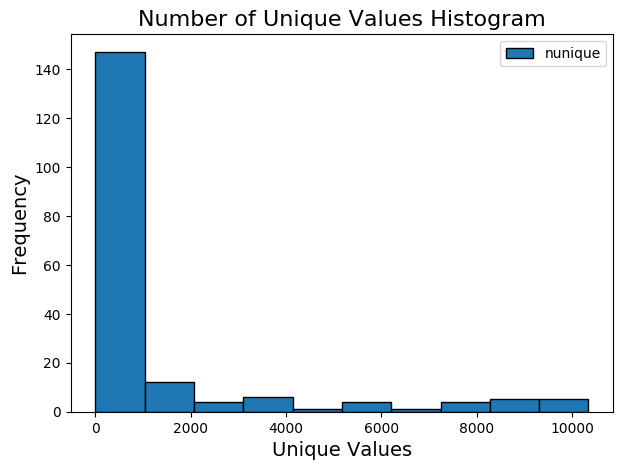

In [130]:
single_unique = fs.ops['single_unique']
fs.plot_unique()
fs.unique_stats.sample(5)

### Features collinearity

In [131]:
fs.identify_collinear(correlation_threshold=0.9)#75)

77 features with a correlation magnitude greater than 0.90.



In [132]:
correlated_features = fs.ops['collinear']


In [133]:
# fs.plot_collinear()
# fs.plot_collinear(plot_all=True)
# fs.identify_collinear(correlation_threshold=0.9)
# fs.plot_collinear()
fs.record_collinear.head()

,drop_feature,corr_feature,corr_value
0,element_type_1_global_neutral_polarity,element_type_1_global_negative_polarity,-0.954407
1,element_type_1_global_rate_positive_words,element_type_1_avg_positive_polarity,0.994801
2,element_type_1_max_positive_polarity,element_type_1_avg_positive_polarity,0.999877
3,element_type_1_max_positive_polarity,element_type_1_global_rate_positive_words,0.994813
4,element_type_1_min_negative_polarity,element_type_1_avg_negative_polarity,0.968906


**task**: either *classification* or *regression*. The metric and labels must match with the task

**eval_metric**: the metric used for early stopping (for example *auc* for classification or *l2* for regression). To see a list of available metrics, refer to the LightGBM docs

**n_iterations**: number of training runs. The feature importances are averaged over the training runs (default = 10)

**early_stopping**: whether to use early stopping when training the model (default = True). Early stopping stops training estimators (decision trees) when the performance on a validation set no longer decreases for a specified number of estimators (100 by default in this implementation). Early stopping is a form of regularization used to prevent overfitting to training data



In [134]:
fs.identify_zero_importance(task='classification', eval_metric='auc', 
                            n_iterations=100, early_stopping=True)

Training Gradient Boosting Model

Training until validation scores don't improve for 100 rounds.
Early stopping, best iteration is:
[46]	valid_0's binary_logloss: 0.658069	valid_0's auc: 0.65264
Training until validation scores don't improve for 100 rounds.
Early stopping, best iteration is:
[67]	valid_0's binary_logloss: 0.656154	valid_0's auc: 0.655156
Training until validation scores don't improve for 100 rounds.
Early stopping, best iteration is:
[103]	valid_0's binary_logloss: 0.660936	valid_0's auc: 0.634475
Training until validation scores don't improve for 100 rounds.
Early stopping, best iteration is:
[49]	valid_0's binary_logloss: 0.667593	valid_0's auc: 0.621297
Training until validation scores don't improve for 100 rounds.
Early stopping, best iteration is:
[110]	valid_0's binary_logloss: 0.653735	valid_0's auc: 0.655298
Training until validation scores don't improve for 100 rounds.
Early stopping, best iteration is:
[32]	valid_0's binary_logloss: 0.657849	valid_0's auc: 0.

Early stopping, best iteration is:
[53]	valid_0's binary_logloss: 0.659265	valid_0's auc: 0.642091
Training until validation scores don't improve for 100 rounds.
Early stopping, best iteration is:
[84]	valid_0's binary_logloss: 0.652303	valid_0's auc: 0.662262
Training until validation scores don't improve for 100 rounds.
Early stopping, best iteration is:
[67]	valid_0's binary_logloss: 0.66015	valid_0's auc: 0.646011
Training until validation scores don't improve for 100 rounds.
Early stopping, best iteration is:
[102]	valid_0's binary_logloss: 0.663781	valid_0's auc: 0.633256
Training until validation scores don't improve for 100 rounds.
Early stopping, best iteration is:
[76]	valid_0's binary_logloss: 0.651565	valid_0's auc: 0.663334
Training until validation scores don't improve for 100 rounds.
Early stopping, best iteration is:
[68]	valid_0's binary_logloss: 0.658438	valid_0's auc: 0.647236
Training until validation scores don't improve for 100 rounds.
Early stopping, best iterati

In [135]:
one_hot_features = fs.one_hot_features
base_features = fs.base_features

print('There are %d original features' % len(base_features))
print('There are %d one-hot features' % len(one_hot_features))

There are 189 original features
There are 0 one-hot features


In [136]:
fs.data_all.head(10)

,element_type_1_average_sentence_length,element_type_1_average_token_length,element_type_1_average_token_length_syllables,element_type_1_avg_negative_polarity,element_type_1_avg_positive_polarity,element_type_1_global_negative_polarity,element_type_1_global_neutral_polarity,element_type_1_global_positive_polarity,element_type_1_global_rate_negative_words,element_type_1_global_rate_positive_words,...,title_surprise,title_syll_ct,title_trust,title_ttr,title_uniq_wd,title_words_diff_emotions,correlation_value,element_12_topics_equal,element_23_topics_equal,element_13_topics_equal
id,,,,,,,,,,,,,,,,,,,,,
56591632,12.333333,5.189189,1.405405,0.052154,0.00000,0.093,0.907,0.000,0.505102,0.000000,...,0,2.105263,0,1.210526,23,0.0000,0.341409,0,0,0
54552310,10.500000,5.714286,1.619048,0.000000,0.00000,0.000,1.000,0.000,0.000000,0.000000,...,0,2.888889,1,1.111111,10,1.0000,0.364848,0,0,0
54556422,10.000000,4.850000,1.250000,0.052154,0.00000,0.145,0.855,0.000,0.508064,0.000000,...,0,1.960000,0,0.960000,24,0.0000,0.997458,0,0,0
54552250,13.000000,4.923077,1.500000,0.000000,0.00000,0.000,1.000,0.000,0.000000,0.000000,...,0,1.952381,0,1.190476,25,0.0000,0.368363,0,0,0
54553702,15.000000,5.866667,1.633333,0.062973,0.90025,0.187,0.732,0.081,0.514282,0.507142,...,0,2.086957,0,1.043478,24,0.0000,0.942991,0,0,0
54552630,20.000000,5.075000,1.425000,0.052154,0.00000,0.231,0.769,0.000,0.514419,0.000000,...,0,1.750000,0,1.062500,34,0.0000,0.369608,0,0,0
54553426,14.500000,5.793103,1.517241,0.000000,0.75026,0.000,0.870,0.130,0.000000,0.513885,...,0,3.000000,0,1.200000,12,-1.0000,0.964792,1,1,1
54554994,10.000000,5.250000,1.250000,0.052154,0.00000,0.151,0.849,0.000,0.508620,0.000000,...,1,2.636364,0,1.363636,15,0.0000,0.363440,0,0,1
54554410,26.000000,5.134615,1.384615,0.052154,0.00000,0.066,0.934,0.000,0.503731,0.000000,...,1,2.058824,0,1.235294,21,1.0000,0.632911,0,0,0


### Try to identify features which are "not important" (fs think so)

In [137]:
zero_importance_features = fs.ops['zero_importance']

### Plot Feature Importances

The feature importance plot using `plot_feature_importances` will show us the `plot_n` most important features (on a normalized scale where the features sum to 1). It also shows us the cumulative feature importance versus the number of features. 

When we plot the feature importances, we can pass in a `threshold` which identifies the number of features required to reach a specified cumulative feature importance. For example, `threshold = 0.99` will tell us the number of features needed to account for 99% of the total importance.

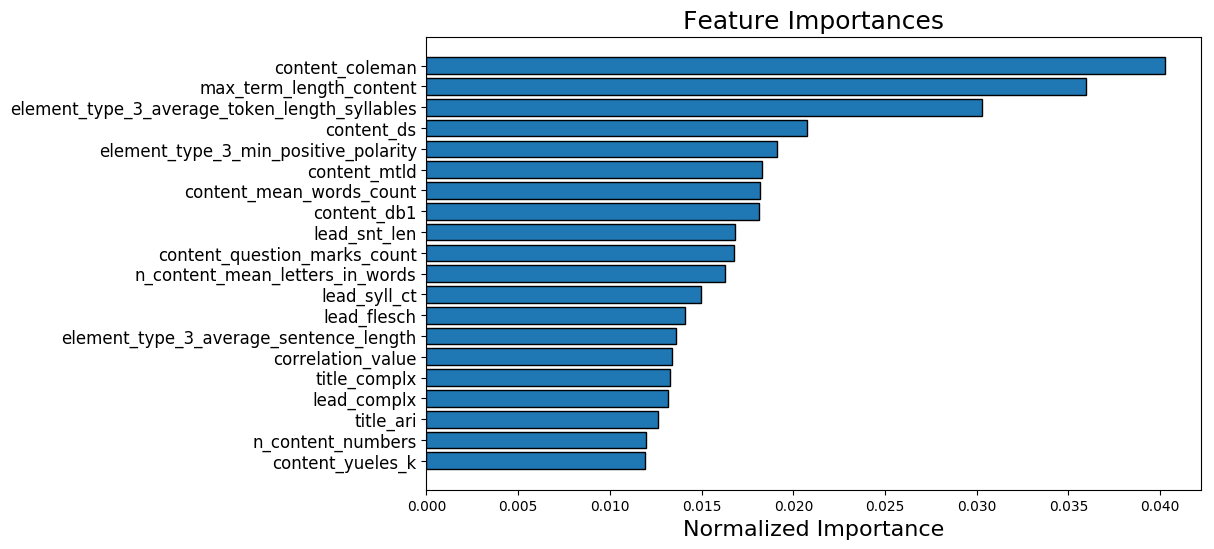

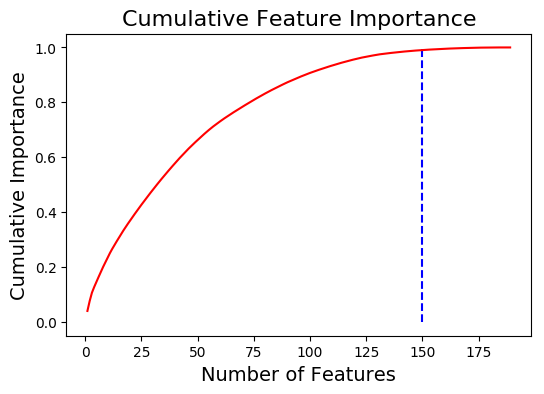

150 features required for 0.99 of cumulative importance


In [138]:
fs.plot_feature_importances(threshold=0.99, plot_n=20)

In [146]:
# try take N important to work with
# fs.feature_importances.head(30)
n_features = 20
n_most_important_features = fs.feature_importances['feature'][:20].values
n_most_important_features

array(['content_coleman', 'max_term_length_content',
       'element_type_3_average_token_length_syllables', 'content_ds',
       'element_type_3_min_positive_polarity', 'content_mtld',
       'content_mean_words_count', 'content_db1', 'lead_snt_len',
       'content_question_marks_count', 'n_content_mean_letters_in_words',
       'lead_syll_ct', 'lead_flesch',
       'element_type_3_average_sentence_length', 'correlation_value',
       'title_complx', 'lead_complx', 'title_ari', 'n_content_numbers',
       'content_yueles_k'], dtype=object)

# Low Importance Features

This method builds off the feature importances from the gradient boosting machine (`identify_zero_importance` must be run first) by finding the lowest importance features not needed to reach a specified cumulative total feature importance. For example, if we pass in 0.99, this will find the lowest important features that are not needed to reach 99% of the total feature importance. 

When using this method, we must have already run `identify_zero_importance` and need to pass in a `cumulative_importance` that accounts for that fraction of total feature importance.

__Note of caution__: this method builds on the gradient boosting model features importances and again is non-deterministic. I advise running these two methods several times with varying parameters and testing each resulting set of features rather than picking one number and sticking to it.

In [74]:
fs.identify_low_importance(cumulative_importance = 0.99)

148 features required for cumulative importance of 0.99 after one hot encoding.
41 features do not contribute to cumulative importance of 0.99.



In [75]:
low_importance_features = fs.ops['low_importance']
low_importance_features[:10]

['element_type_1_avg_positive_polarity',
 'element_type_1_rate_positive_words',
 'lead_disgust',
 'content_rld',
 'lead_anticipation',
 'title_pos',
 'lead_trust',
 'element_type_2_avg_positive_polarity',
 'element_23_topics_equal',
 'element_type_1_rate_negative_words']

In [76]:
all_to_remove = fs.check_removal()
all_to_remove

Total of 103 features identified for removal


['title_pos',
 'content_total_words_count',
 'element_type_3_rate_positive_words',
 'content_db_grade',
 'element_type_3_global_rate_positive_words',
 'title_joy',
 'element_type_3_global_neutral_polarity',
 'lead_surprise',
 'element_type_1_max_negative_polarity',
 'lead_syll_ct',
 'element_type_2_avg_negative_polarity',
 'content_cttr',
 'element_type_1_n_tokens_content',
 'element_type_2_avg_positive_polarity',
 'title_fear',
 'content_mean_emotionality',
 'element_type_3_n_symbols',
 'element_type_2_min_negative_polarity',
 'element_type_2_global_neutral_polarity',
 'n_content_words',
 'element_type_2_rate_positive_words',
 'n_lead_words',
 'title_disgust',
 'n_title_letters',
 'element_type_1_rate_negative_words',
 'element_type_3_n_symbols_no_space',
 'element_type_3_n_unique_tokens',
 'title_surprise',
 'element_type_3_max_positive_polarity',
 'content_ttr',
 'content_dots_count',
 'title_uniq_wd',
 'content_count_of_types',
 'n_content_letters',
 'element_type_2_global_sentimen

In [77]:
train_removed = fs.remove(methods=['collinear', 'zero_importance', 'low_importance'])

Removed 103 features.


In [78]:
train_removed.head()

,element_type_1_average_sentence_length,element_type_1_average_token_length,element_type_1_average_token_length_syllables,element_type_1_avg_negative_polarity,element_type_1_global_negative_polarity,element_type_1_global_positive_polarity,element_type_1_global_rate_negative_words,element_type_1_global_sentiment_polarity,element_type_1_global_subjectivity,element_type_1_n_sentences,...,n_title_mean_letters_in_words,n_title_numbers,title_ari,title_complx,title_flesch,title_max_term_length,title_snt_len,title_words_diff_emotions,correlation_value,element_12_topics_equal
id,,,,,,,,,,,,,,,,,,,,,
56591632,12.333333,5.189189,1.405405,0.052154,0.093,0.000,0.505102,-0.5994,1,3,...,4.894737,2,8.6,1.210526,19.53,9,11.5,0.0,0.341409,0
54552310,10.500000,5.714286,1.619048,0.000000,0.000,0.000,0.000000,0.0000,0,2,...,4.666667,0,4.3,1.111111,-23.28,7,10.0,1.0,0.364848,0
54556422,10.000000,4.850000,1.250000,0.052154,0.145,0.000,0.508064,-0.5994,1,2,...,5.160000,0,16.7,0.960000,12.26,8,24.0,0.0,0.997458,0
54552250,13.000000,4.923077,1.500000,0.000000,0.000,0.000,0.000000,0.0000,1,2,...,4.857143,1,13.3,1.190476,16.32,12,25.0,0.0,0.368363,0
54553702,15.000000,5.866667,1.633333,0.062973,0.187,0.081,0.514282,-0.6369,0,2,...,5.739130,0,12.6,1.043478,17.50,19,12.0,0.0,0.942991,0


In [79]:
print(train_labels.shape, train_removed.shape)
print(train_labels.index, train_removed.index)

(10342,) (10342, 86)
Int64Index([56591632, 54552310, 54556422, 54552250, 54553702, 54552630,
            54553426, 54554994, 54554410, 54555990,
            ...
            56029634, 56026848, 56027508, 56020728, 56029026, 56002348,
            56028274, 56004606, 56028322, 56015734],
           dtype='int64', name='id', length=10342) Int64Index([56591632, 54552310, 54556422, 54552250, 54553702, 54552630,
            54553426, 54554994, 54554410, 54555990,
            ...
            56029634, 56026848, 56027508, 56020728, 56029026, 56002348,
            56028274, 56004606, 56028322, 56015734],
           dtype='int64', name='id', length=10342)


In [80]:
important_df = pd.concat((train_labels, train_removed), axis=1)
important_df.shape

(10342, 87)

In [83]:
important_df.to_csv('../tmp/axel_fs_N_important.csv')

In [82]:
important_df[important_df['is_viral'] == 0].shape

(5171, 87)

Take **N** important features and make dataset

In [147]:
train_n_important_features = train[n_most_important_features]
n_important_df = pd.concat((train_labels, train_n_important_features), axis=1)
n_important_df.to_csv('../tmp/axel_fs_N_important.csv')